In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Kapil\Downloads\Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## Data Set Information:

The dataset has two regions of Algeria,namely the Bejaia region and the Sidi Bel-abbes region located.
The period from June 2012 to September 2012.


## Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and notFire



In [4]:
df.shape

(246, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### Finding Duplicate value

In [6]:
df.duplicated().sum()

0

### Finding null value in each column

In [7]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [8]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


### Show the rows btwn 121 to 124

In [9]:
df.iloc[121:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


### Drop 122 and 123 rows

In [10]:
df.drop([122,123],inplace=True)

In [11]:
df.iloc[121:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


### Reset the index of data after removing some row between the data

In [12]:
df.reset_index(inplace=True)

In [13]:
df.iloc[121:125]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


### Drop the old index from which row is removed

In [14]:
df.drop('index',axis=1,inplace=True)

In [15]:
df.iloc[121:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


In [16]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

### Removing unnecessary space in column headers using str.strip()

In [17]:
df.columns = df.columns.str.strip()

In [18]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

### Creating a new column called Region in which, Bejaia is -:1 and Sidi Bel-abbes is -:0

In [19]:
df.loc[:122,"Region"]=1
df.loc[122:,"Region"]=0

In [20]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,0.0
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,0.0
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0.0
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0.0


In [21]:
df.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object

### Converting object columns into int columns  

In [22]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]].astype(int)

In [23]:
df.dtypes

day             int32
month           int32
year            int32
Temperature     int32
RH              int32
Ws              int32
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object

### Dropping rows with null values

In [24]:
df.dropna(inplace=True)

In [25]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [26]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

### Removing unnecessary space in column headers using str.strip()

In [27]:
df.Classes=df.Classes.str.strip()
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [28]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### Converting object columns into int columns

In [29]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')

In [30]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object

### Convert not fire is 0 and fire is 1 by the one hot encoding

In [31]:
df['Classes'] = df['Classes'].apply(lambda x:0 if 'not fire' in x else 1)

In [32]:
df.tail(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,0
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,0


### Here we analyse the percentage of fire and not fire in Classes(Target) columns

In [33]:
df['Classes'].value_counts(normalize=True)*100

1    56.378601
0    43.621399
Name: Classes, dtype: float64

### Here  we Show the Graph of Fire and not Fire

Text(0.5, 1.0, 'Class Distributions \n 0: not Fire || 1: fire')

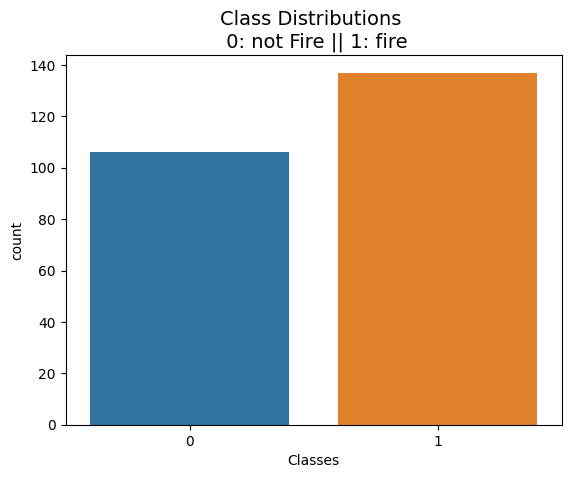

In [34]:
sns.countplot('Classes', data=df, palette="tab10")
plt.title('Class Distributions \n 0: not Fire || 1: fire', fontsize=14)

### Drop year column because  year(2012)  is constant

In [35]:
df = df.drop(['year'],axis=1)

In [36]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [37]:
df.shape

(243, 14)

### Univariate analysis for Numrical Columns

The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

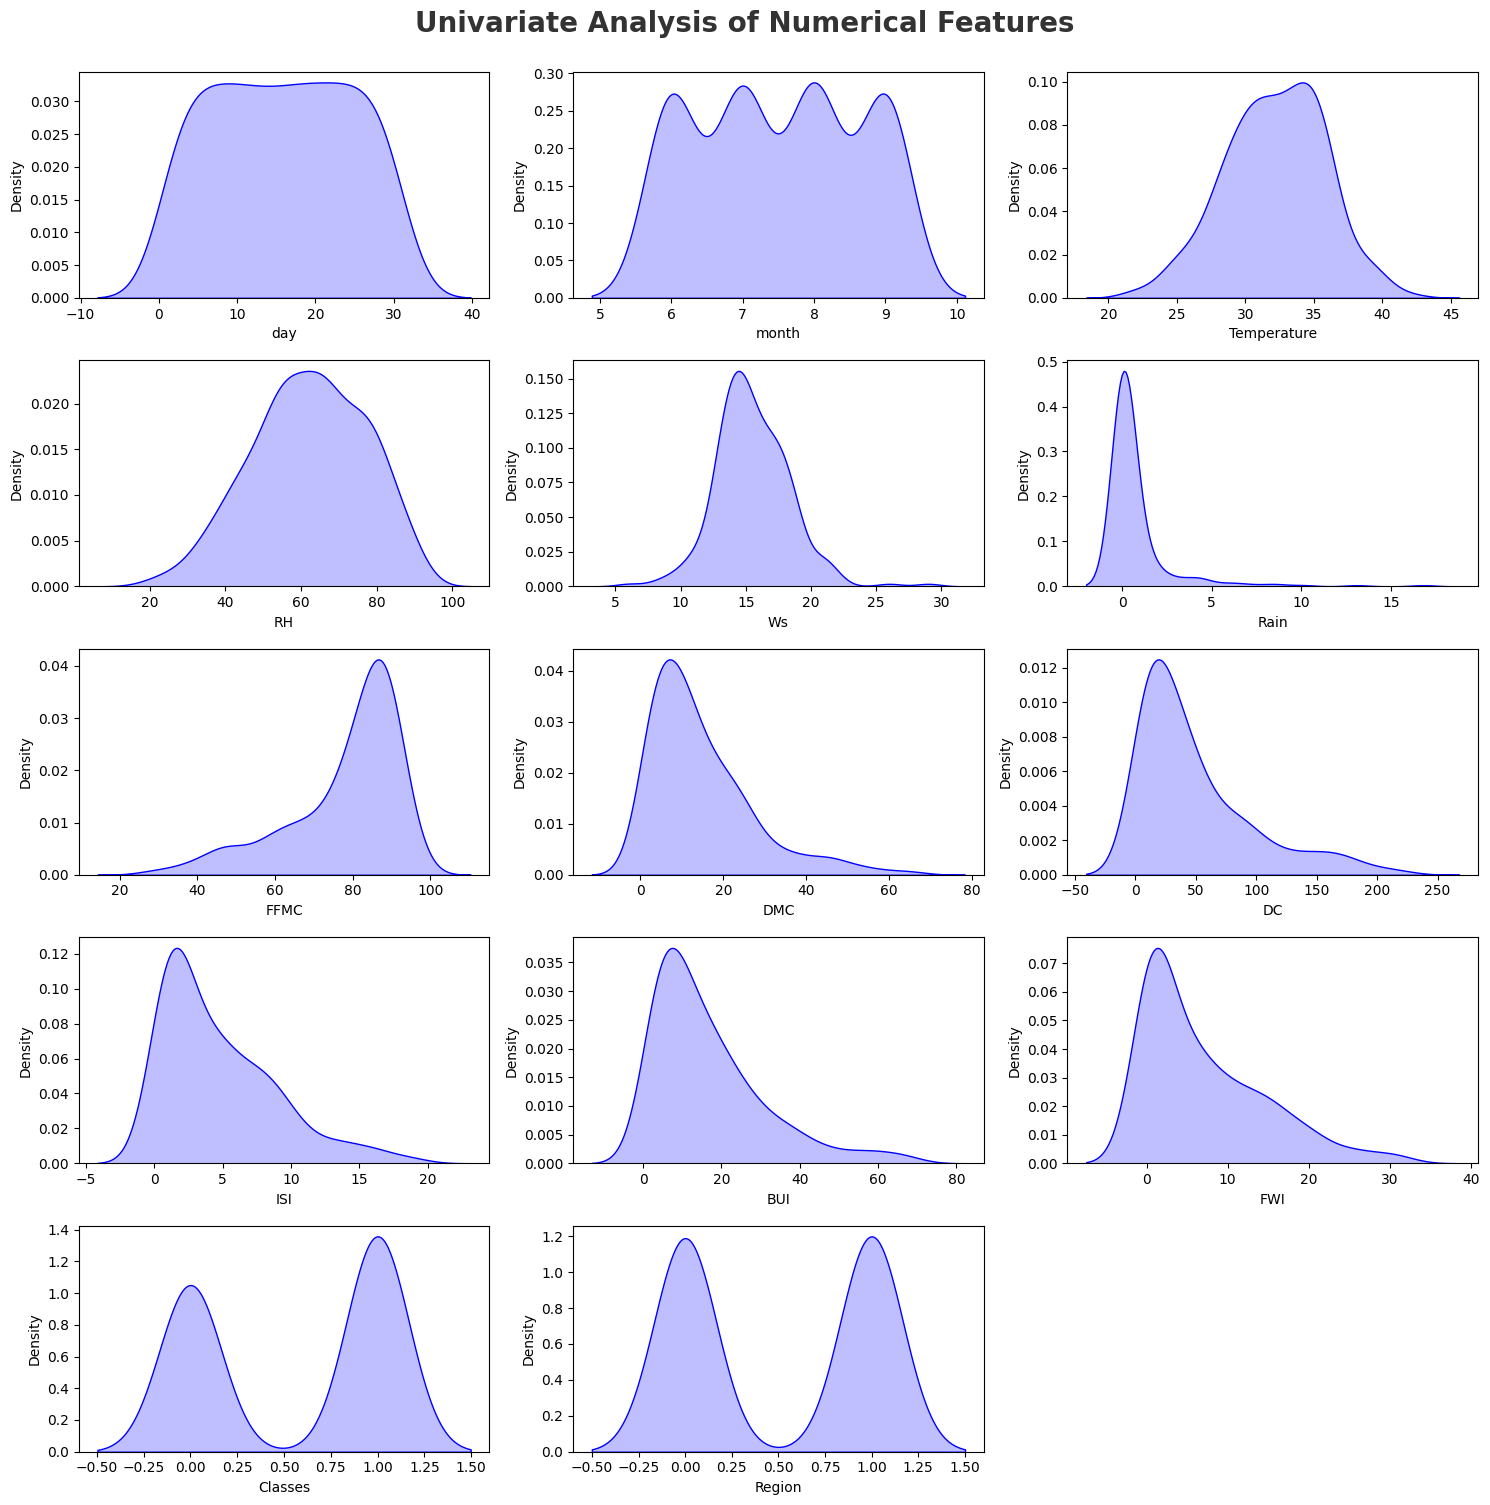

In [38]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(df.columns)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[df.columns[i]],shade=True, color='b')
    plt.xlabel(df.columns[i])
    plt.tight_layout()

### Report of Graph:-

### 1.Right Skewed-Ws,Rain,DMC,DC,ISI,BUI,FWI
### 2.Left Skewed-FFMC

### Mulivariate Analysis for Numerical Features

### Here we find Multicollinearity occurs, This means when two or more different independent features have highly correlation with each other.Let assume some features are highly correlated,might difficult to distinguishing between their individual effects on the dependent features. Multicollinearity can be detect using various technique

## one such technique is Corr


In [39]:
df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,-0.000821
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,-0.001857
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,-0.269555
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,0.402682
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,0.181160
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,0.040013
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,-0.222241
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,-0.192089
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,0.078734
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,-0.263197


### Here we find high correlation in DMC and BUI(it can judge by when relationship is graterthenequalto 85%),so we drop one columns between(DMC and BUI),(ISI and FWI),(DMC and DC and FWI) on the basic of P-value.(If it is greater then 0.05 then remove one feature btwn both of them) 
### corelation between two columns means the both columns provide same information so we choose any one columns.

In [40]:
X = df.iloc[:,:-2]# 0r iloc[:, 11:-1] 
y = df['Classes']

In [41]:
X.head(10)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
6,7,6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
7,8,6,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1
8,9,6,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3
9,10,6,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9


In [42]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: Classes, dtype: int64

### OLS(Ordinary Least Square) is one of technique to check Multicollinearity by P-value

In [43]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Classes   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     47.46
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           2.12e-55
Time:                        16:25:02   Log-Likelihood:                -22.996
No. Observations:                 243   AIC:                             71.99
Df Residuals:                     230   BIC:                             117.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.6719      0.398     -4.203      0.000      -2.456      -0.888
day            -0.0011      0.002     -0.470      0.638      -0.006       0.004
month          -0.0106      0.016     -0.643      0.521      -0.043       0.022
Temperature    -0.0022      0.008     -0.287      0.774      -0.017       0.013
RH              0.0101      0.002      5.113      0.000       0.006       0.014
Ws             -0.0140      0.007     -1.952      0.052      -0.028       0.000
Rain            0.0215      0.011      1.969      0.050   -9.11e-06       0.043
FFMC            0.0224      0.002      9.029      0.000       0.018       0.027
DMC            -0.0216      0.012     -1.742      0.083      -0.046       0.003
DC             -0.0008      0.002     -0.430      0.668      -0.004       0.003
ISI             0.0260      0.020      1.277      0.203      -0.014       0.066
BUI             0.0150      0.016      0.925      0.356      -0.017       0.047
FWI             0.0304      0.015      2.022      0.044       0.001       0.060
==============================================================================
Omnibus:                        1.301   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.522   Jarque-Bera (JB):                1.225
Skew:                          -0.038   Prob(JB):                        0.542
Kurtosis:                       2.661   Cond. No.                     2.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Drop BUI ISI,DC column because high corelation

In [45]:
df = df.drop(['BUI','ISI',"DC"],axis=1)

In [46]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,0.5,0,1
1,2,6,29,61,13,1.3,64.4,4.1,0.4,0,1
2,3,6,26,82,22,13.1,47.1,2.5,0.1,0,1
3,4,6,25,89,13,2.5,28.6,1.3,0.0,0,1
4,5,6,27,77,16,0.0,64.8,3.0,0.5,0,1


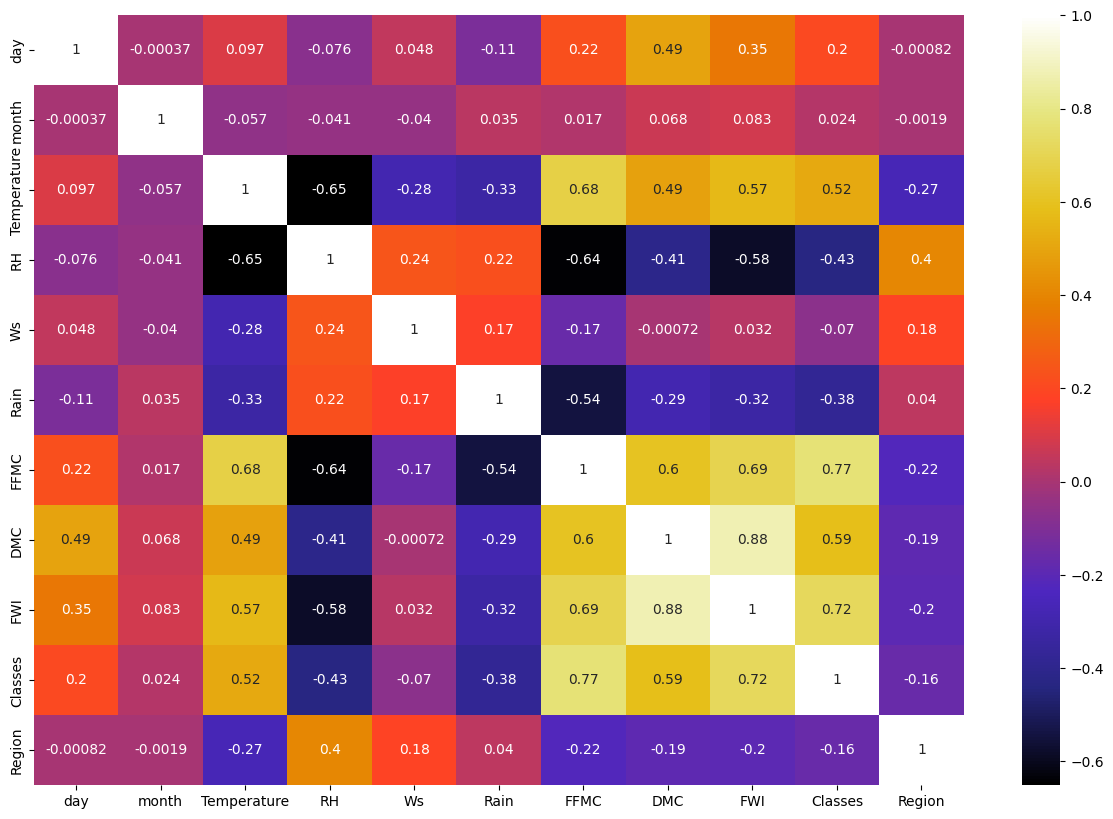

In [47]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

### Initial Analyse for some columns with Target Column(Classes) Where not fire is 0 and fire is 1

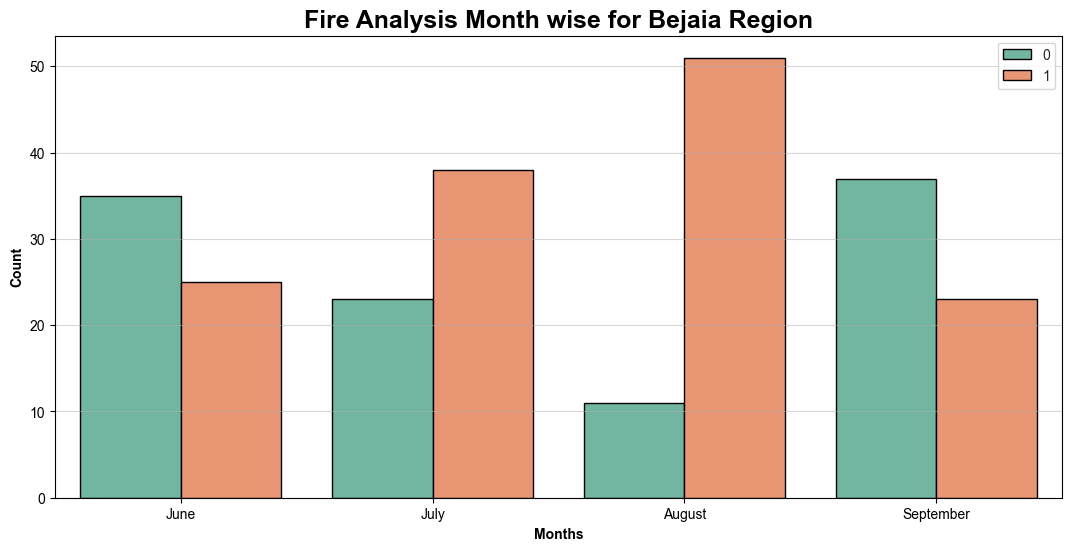

In [48]:
dftemp= df.loc[df['Region']== 0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

Report- When Temperature is High Fire is High

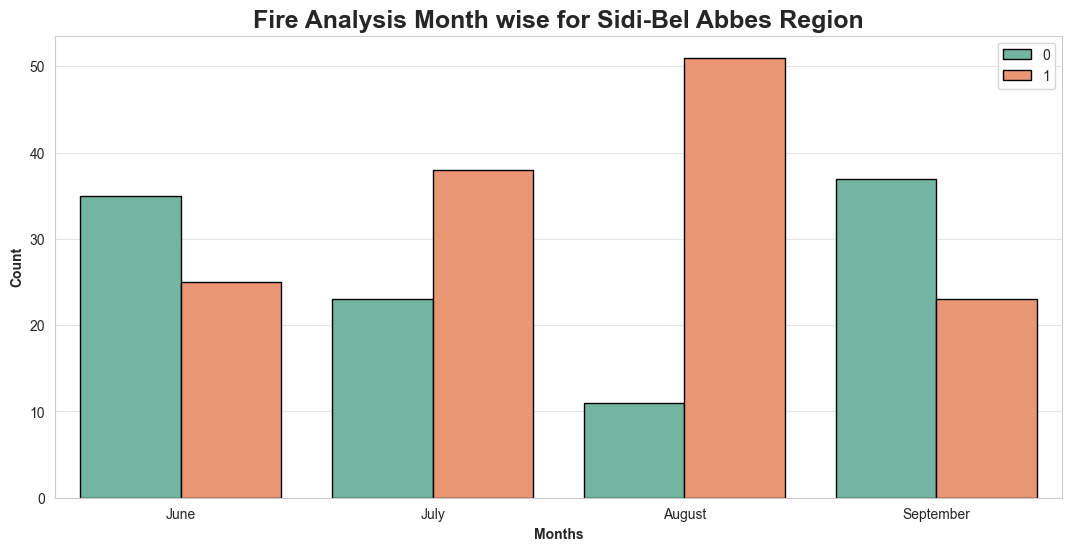

In [49]:
dftemp= df.loc[df['Region']== 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

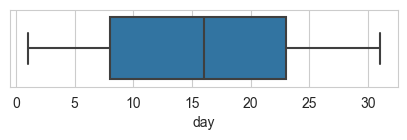

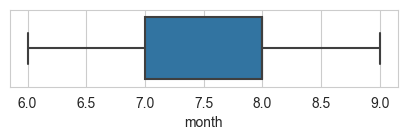

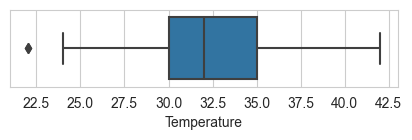

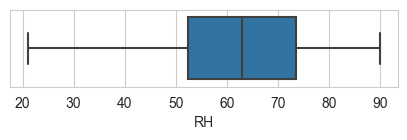

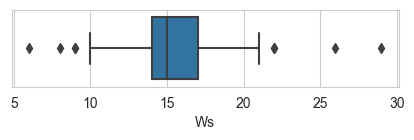

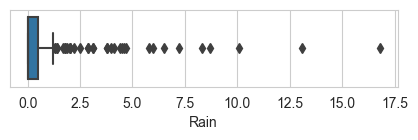

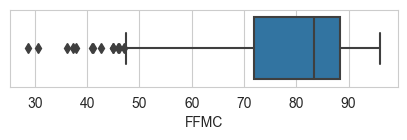

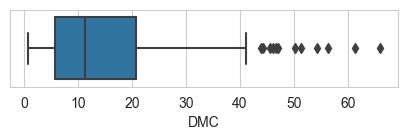

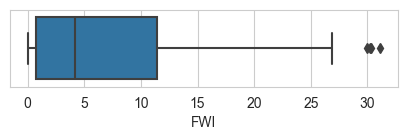

In [50]:
for column in df.iloc[:,0:9]:
        plt.figure(figsize=(5,1))
        sns.boxplot(data=df, x=column)

Outliers found in some columns-Ws,Rain,,FWI

### Handle Outliers

In [51]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [52]:
outliers = find_outliers_IQR(df[['day','month','Temperature','RH','Ws','Rain','FFMC','DMC','FWI','Classes','Region']])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers#### If the value is not an outlier, it will display as NaN (not a number)

number of outliers: 243
max outlier value: day             NaN
month           NaN
Temperature    22.0
RH              NaN
Ws             29.0
Rain           16.8
FFMC           47.1
DMC            65.9
FWI            31.1
Classes         NaN
Region          NaN
dtype: float64
min outlier value: day             NaN
month           NaN
Temperature    22.0
RH              NaN
Ws              6.0
Rain            1.3
FFMC           28.6
DMC            43.9
FWI            30.0
Classes         NaN
Region          NaN
dtype: float64


,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,FWI,Classes,Region
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1.3,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,22.0,13.1,47.1,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,2.5,28.6,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,NaN,NaN,NaN,NaN,NaN,4.4,41.1,NaN,NaN,NaN,NaN
241,NaN,NaN,NaN,NaN,29.0,NaN,45.9,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
def impute_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    upper = df[~(df>(q3+1.5*IQR))].max()
    lower = df[~(df<(q1-1.5*IQR))].min()
    df = np.where(
        df > upper,
        upper,
        np.where(
            df < lower,
            lower,
            df
            )
        )

    return df

In [54]:
df[['Temperature','Ws','Rain','FFMC','DMC','FWI']] = impute_outliers_IQR(df[['Temperature','Ws','Rain','FFMC','DMC','FWI']])

df.describe()[['Temperature','Ws','Rain','FFMC','DMC','FWI']]

,Temperature,Ws,Rain,FFMC,DMC,FWI
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.168724,15.465021,0.304115,78.222222,14.189300,6.977778
std,3.586062,2.527904,0.450509,13.344721,10.958263,7.270142
min,24.000000,10.000000,0.000000,47.400000,0.700000,0.000000
25%,30.000000,14.000000,0.000000,71.850000,5.800000,0.700000
50%,32.000000,15.000000,0.000000,83.300000,11.300000,4.200000
75%,35.000000,17.000000,0.500000,88.300000,20.800000,11.450000
max,42.000000,21.000000,1.200000,96.000000,41.100000,26.900000


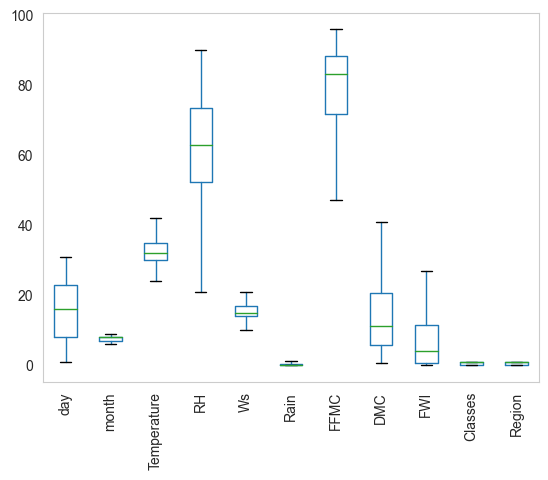

In [55]:
boxplot = df.boxplot(grid=False, rot=90, fontsize=10) 

In [56]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,FWI,Classes,Region
0,1,6,29.0,57,18.0,0.0,65.7,3.4,0.5,0,1
1,2,6,29.0,61,13.0,1.2,64.4,4.1,0.4,0,1
2,3,6,26.0,82,21.0,1.2,47.4,2.5,0.1,0,1
3,4,6,25.0,89,13.0,1.2,47.4,1.3,0.0,0,1
4,5,6,27.0,77,16.0,0.0,64.8,3.0,0.5,0,1


In [57]:
import movecolumn as mc
mc.MoveToLast(df,'Temperature')

,day,month,RH,Ws,Rain,FFMC,DMC,FWI,Classes,Region,Temperature
0,1,6,57,18.0,0.0,65.7,3.4,0.5,0,1,29.0
1,2,6,61,13.0,1.2,64.4,4.1,0.4,0,1,29.0
2,3,6,82,21.0,1.2,47.4,2.5,0.1,0,1,26.0
3,4,6,89,13.0,1.2,47.4,1.3,0.0,0,1,25.0
4,5,6,77,16.0,0.0,64.8,3.0,0.5,0,1,27.0
...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,65,14.0,0.0,85.4,16.0,6.5,1,0,30.0
240,27,9,87,15.0,1.2,47.4,6.5,0.0,0,0,28.0
241,28,9,87,21.0,0.5,47.4,3.5,0.2,0,0,27.0
242,29,9,54,18.0,0.1,79.7,4.3,0.7,0,0,24.0


In [58]:
## Independent And Dependent Features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [59]:
X.head()

,day,month,RH,Ws,Rain,FFMC,DMC,FWI,Classes,Region
0,1,6,57,18.0,0.0,65.7,3.4,0.5,0,1
1,2,6,61,13.0,1.2,64.4,4.1,0.4,0,1
2,3,6,82,21.0,1.2,47.4,2.5,0.1,0,1
3,4,6,89,13.0,1.2,47.4,1.3,0.0,0,1
4,5,6,77,16.0,0.0,64.8,3.0,0.5,0,1


In [60]:
y.head()

0    29.0
1    29.0
2    26.0
3    25.0
4    27.0
Name: Temperature, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,
                                                    random_state=0)
X_train.shape, X_test.shape

((182, 10), (61, 10))

In [62]:
X_train.shape

(182, 10)

In [63]:
y_train.shape

(182,)

In [64]:
X_test.shape

(61, 10)

In [65]:
y_test.shape

(61,)

In [66]:
## Standardize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [67]:
scaler

StandardScaler()

In [68]:
X_train=scaler.fit_transform(X_train)

In [69]:
X_test=scaler.transform(X_test)

In [70]:
X_train

array([[ 0.19763619,  1.34865164, -1.8394432 , ...,  1.0430125 ,
         0.88561489, -1.02222494],
       [-1.13870263,  1.34865164,  0.64088224, ..., -0.93285602,
        -1.12915898, -1.02222494],
       [-1.47278733,  0.44624503, -1.8394432 , ...,  1.58308323,
         0.88561489, -1.02222494],
       ...,
       [ 1.08852874,  1.34865164, -0.46873704, ..., -0.76161408,
        -1.12915898,  0.97825827],
       [ 0.19763619, -0.45616158,  0.44506707, ..., -0.19519844,
         0.88561489,  0.97825827],
       [ 0.64308246, -0.45616158, -0.86036737, ...,  2.36025819,
         0.88561489, -1.02222494]])

In [71]:
X_test

array([[ 0.30899776,  1.34865164, -0.27292187, -0.58195657, -0.65746097,
         0.79819702, -0.19080096,  0.29218246,  0.88561489,  0.97825827],
       [ 1.42261344, -1.3585682 , -1.64362804, -0.97279088,  0.69715673,
         0.56554591,  0.29299466, -0.03712896,  0.88561489, -1.02222494],
       [-0.91597949, -0.45616158,  0.44506707,  1.37221495, -0.65746097,
         0.52051666, -0.19080096,  0.0682507 ,  0.88561489,  0.97825827],
       [-0.13644851,  0.44624503, -0.40346532, -0.97279088,  0.01984788,
         0.28036067,  0.08693356, -0.15568107,  0.88561489,  0.97825827],
       [ 0.19763619,  1.34865164, -0.79509565, -1.75445949, -0.65746097,
         0.80570189, -0.43269877,  0.02873333,  0.88561489,  0.97825827],
       [-0.58189479,  0.44624503,  0.11870846, -0.97279088, -0.65746097,
         0.76817752,  0.63344344,  0.60832143,  0.88561489,  0.97825827],
       [-1.69551047, -1.3585682 ,  0.64088224, -1.36362518,  0.92292634,
        -1.6183726 , -1.08671879, -0.95920094

## Model Training

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
regression=LinearRegression()

In [74]:
regression

LinearRegression()

In [75]:
regression.fit(X_train,y_train)

LinearRegression()

In [76]:
## print the coefficients and the intercept
print(regression.coef_)

[-0.43328225 -0.29879592 -0.67728104 -0.7719856   0.82571106  2.06464466
  0.50354314  0.74533249 -0.39808335  0.01946712]


In [77]:
print(regression.intercept_)

32.24175824175824


In [78]:
## PRediction for the test data
reg_pred=regression.predict(X_test)

In [79]:
reg_pred

array([33.23232261, 35.38619346, 31.56726687, 33.38125248, 34.23671908,
       34.51313227, 30.58914144, 33.21044496, 32.54925167, 33.98516941,
       31.00393512, 33.43408539, 34.36933251, 34.71776545, 32.94806834,
       28.0137949 , 33.40749213, 31.49629998, 31.31887468, 27.85937632,
       32.64211936, 31.50674791, 31.24556222, 30.87495382, 32.17911527,
       30.60939694, 32.95245003, 29.53482564, 26.78035266, 32.27304903,
       32.84389999, 27.32285543, 30.65874871, 35.28273104, 32.05651184,
       32.22162704, 33.53607822, 33.64391022, 37.17274995, 33.70247354,
       31.74231397, 28.01759398, 25.59814562, 31.8823654 , 30.7966929 ,
       27.24813876, 30.83616058, 32.87128253, 25.01048631, 33.80754131,
       32.56724989, 33.07316022, 25.21691674, 29.99564165, 29.64268732,
       30.89654274, 32.80595719, 34.89691605, 33.63898646, 35.14082897,
       30.60012586])

### Assumptions Of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

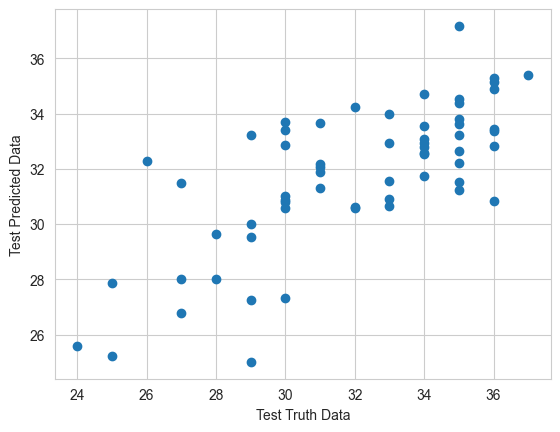

In [80]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [81]:
## residuals
residuals=y_test-reg_pred

In [82]:
residuals

110   -4.232323
150    1.613807
37     1.432733
75     2.618748
109   -2.236719
         ...   
180    1.194043
160    1.103084
159    1.361014
171    0.859171
222   -0.600126
Name: Temperature, Length: 61, dtype: float64

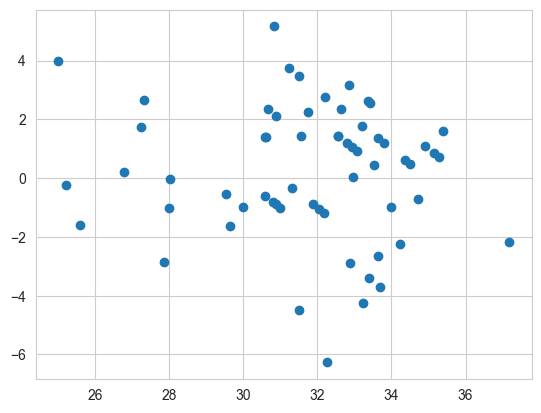

In [83]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

In [84]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

5.048488404390567
1.8215699934170666
2.2468841546440634


## R square and adjusted R square

In [85]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5268393191089289


In [86]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.4322071829307147

### Ridge Regression

In [87]:
from sklearn.linear_model import Ridge

In [88]:
ridge_regression = Ridge()

In [89]:
ridge_regression

Ridge()

In [90]:
ridge_regression.fit(X_train,y_train)

Ridge()

In [91]:
## print the coefficients and the intercept
print(ridge_regression.coef_)

[-0.42999093 -0.29825132 -0.72256762 -0.76752555  0.77125252  1.95893735
  0.53648516  0.69936755 -0.3555594   0.01794468]


In [92]:
print(ridge_regression.intercept_)

32.24175824175824


In [93]:
## PRediction for the test data
rgd_pred=ridge_regression.predict(X_test)

In [94]:
rgd_pred

array([33.21172233, 35.41305756, 31.5574982 , 33.41045235, 34.23751781,
       34.48542382, 30.63035934, 33.20556429, 32.57621513, 33.96537222,
       30.96435955, 33.4413537 , 34.42115971, 34.71322872, 32.86787454,
       28.08336034, 33.35893591, 31.50096844, 31.31759638, 27.96209971,
       32.7110034 , 31.51151776, 31.21374177, 30.86259085, 32.1996889 ,
       30.6543906 , 32.9654381 , 29.51484572, 26.80743035, 32.31745237,
       32.82588502, 27.36672708, 30.61060297, 35.2746179 , 32.05708126,
       32.1889434 , 33.4390715 , 33.65099858, 37.17249647, 33.64945043,
       31.73577238, 28.03783531, 25.72596392, 31.87293323, 30.78096082,
       27.31614723, 30.87536484, 32.83560568, 25.17531859, 33.83512336,
       32.55998527, 33.06549008, 25.24545698, 30.00920225, 29.61678592,
       30.82504796, 32.81157285, 34.85664277, 33.60543815, 35.15567696,
       30.58460059])

### Assumptions Of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

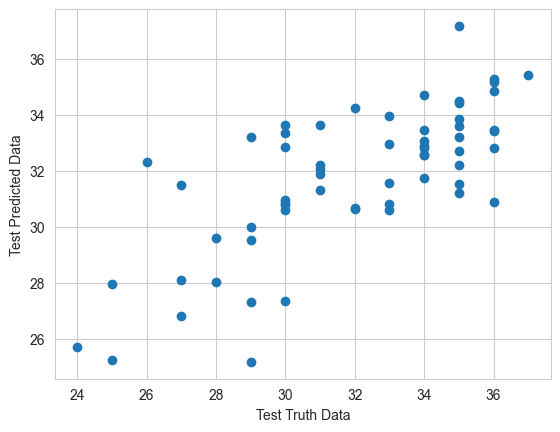

In [95]:
plt.scatter(y_test,rgd_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [96]:
## residuals
residuals=y_test-rgd_pred

In [97]:
residuals

110   -4.211722
150    1.586942
37     1.442502
75     2.589548
109   -2.237518
         ...   
180    1.188427
160    1.143357
159    1.394562
171    0.844323
222   -0.584601
Name: Temperature, Length: 61, dtype: float64

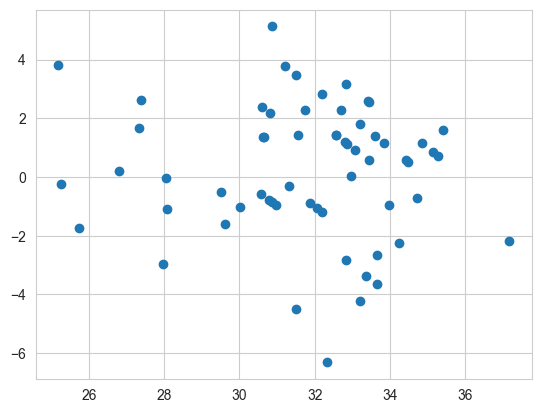

In [98]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(rgd_pred,residuals)

In [99]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,rgd_pred))
print(mean_absolute_error(y_test,rgd_pred))
print(np.sqrt(mean_squared_error(y_test,rgd_pred)))

5.0303259746673765
1.8205442903469855
2.2428388204834016


### R square and adjusted R square

In [100]:
from sklearn.metrics import r2_score
score=r2_score(y_test,rgd_pred)
print(score)

0.5285415608347863


In [101]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.43424987300174356

### Lasso Regression

In [102]:
from sklearn.linear_model import Lasso

In [103]:
lasso = Lasso()

In [104]:
lasso

Lasso()

In [105]:
lasso.fit(X_train,y_train)

Lasso()

In [106]:
## print the coefficients and the intercept
print(lasso.coef_)

[ 0.         -0.         -0.76519834 -0.         -0.          1.00080927
  0.          0.          0.         -0.        ]


In [107]:
print(lasso.intercept_)

32.24175824175824


In [108]:
## PRediction for the test data
lasso_pred=lasso.predict(X_test)

In [109]:
lasso_pred

array([33.24944058, 34.06546328, 32.42213155, 32.83107679, 33.65651804,
       32.91972191, 30.13167392, 32.77701389, 32.95388278, 32.86977609,
       31.69170181, 33.2693426 , 33.65312418, 33.93892172, 31.47761988,
       29.45420233, 31.98721979, 32.30832277, 32.11719502, 28.96713526,
       32.30420569, 32.39959871, 31.35332763, 29.92662902, 32.24674892,
       32.40634662, 32.45968629, 30.16209923, 28.94910103, 31.54594164,
       33.44171289, 29.95255572, 30.24208883, 33.46424573, 32.52953413,
       31.9958753 , 32.21029893, 32.39998023, 34.40871759, 32.22230848,
       32.35228372, 31.0461418 , 28.853708  , 32.64330309, 32.00864789,
       28.50408731, 32.36616105, 32.24751196, 28.65392475, 32.54078064,
       32.32712005, 33.10185244, 28.65392475, 31.71198535, 31.48780147,
       31.50957127, 33.05941758, 33.42291561, 33.11046813, 33.64412697,
       31.63500809])

### Assumptions Of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

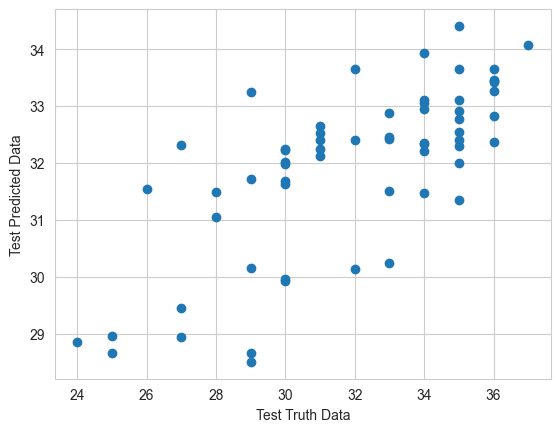

In [110]:
plt.scatter(y_test,lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [111]:
## residuals
residuals=y_test-lasso_pred

In [112]:
residuals

110   -4.249441
150    2.934537
37     0.577868
75     3.168923
109   -1.656518
         ...   
180    0.940582
160    2.577084
159    1.889532
171    2.355873
222   -1.635008
Name: Temperature, Length: 61, dtype: float64

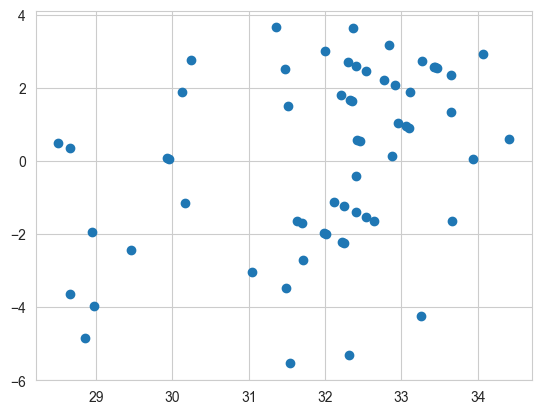

In [113]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(lasso_pred,residuals)

In [114]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

5.900329165215266
2.083941439991456
2.4290593169404624


### R square and adjusted R square

In [115]:
from sklearn.metrics import r2_score
score=r2_score(y_test,lasso_pred)
print(score)

0.447002044638406


In [116]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3364024535660871

### ElasticNet Regression

In [117]:
from sklearn.linear_model import ElasticNet

In [118]:
elasticnet = ElasticNet()

In [119]:
elasticnet

ElasticNet()

In [120]:
elasticnet.fit(X_train,y_train)

ElasticNet()

In [121]:
## print the coefficients and the intercept
print(elasticnet.coef_)

[-0.         -0.         -0.72730976 -0.28097595 -0.          0.68503456
  0.21616959  0.32819316  0.06361066 -0.        ]


In [122]:
print(elasticnet.intercept_)

32.24175824175824


In [123]:
## PRediction for the test data
elasticnet_pred=elasticnet.predict(X_test)

In [124]:
elasticnet_pred

array([33.26154679, 34.20541989, 31.92655772, 33.02462357, 33.83716194,
       33.34789209, 30.42859776, 32.8961511 , 32.49431629, 33.45480398,
       31.3709041 , 33.43898125, 33.53844794, 33.80285331, 31.45466064,
       29.49918936, 31.89547013, 31.60870632, 31.95517749, 29.40472467,
       32.68991598, 32.07543801, 31.34156242, 30.15573522, 32.00134262,
       31.84043437, 32.65986159, 30.12705128, 28.53944001, 32.0992509 ,
       33.22840401, 29.48297747, 30.476116  , 34.27291402, 32.65522186,
       31.67917709, 31.83624543, 33.00388307, 35.49513666, 31.9852103 ,
       32.13123138, 30.09556668, 29.03863228, 32.01168359, 31.6129305 ,
       28.94144664, 31.91129096, 32.13321025, 28.7389262 , 32.9804675 ,
       32.24660289, 32.73792954, 28.19759781, 31.22832496, 31.13014296,
       30.83518329, 33.07272447, 33.11111047, 32.51808154, 34.12484279,
       31.39263525])

### Assumptions Of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

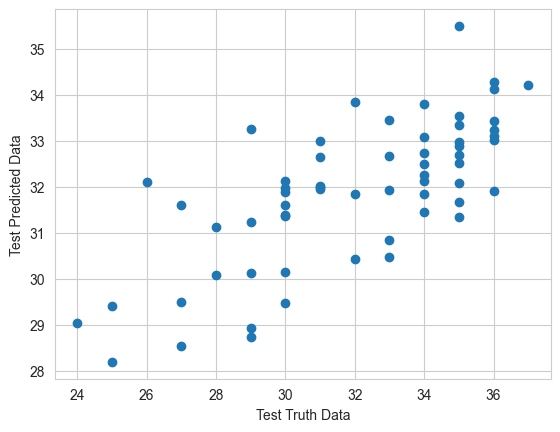

In [125]:
plt.scatter(y_test,elasticnet_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [126]:
## residuals
residuals=y_test-elasticnet_pred

In [127]:
residuals

110   -4.261547
150    2.794580
37     1.073442
75     2.975376
109   -1.837162
         ...   
180    0.927276
160    2.888890
159    2.481918
171    1.875157
222   -1.392635
Name: Temperature, Length: 61, dtype: float64

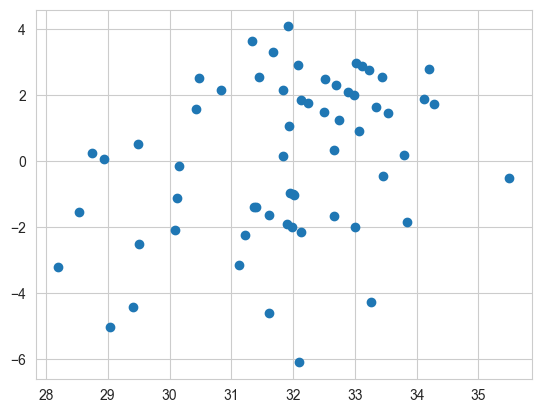

In [128]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(elasticnet_pred,residuals)

In [129]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elasticnet_pred))
print(mean_absolute_error(y_test,elasticnet_pred))
print(np.sqrt(mean_squared_error(y_test,elasticnet_pred)))

5.748324017921067
2.0442507439048856
2.397566269766295


### R square and adjusted R square

In [130]:
from sklearn.metrics import r2_score
score=r2_score(y_test,elasticnet_pred)
print(score)

0.46124845925433755


In [131]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3534981511052051